In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
sub_df = df.sample(30000)

In [5]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 216046 to 321292
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [6]:
sub_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
sub_df.duplicated().sum()

0

0    18958
1    11042
Name: is_duplicate, dtype: int64


<AxesSubplot:>

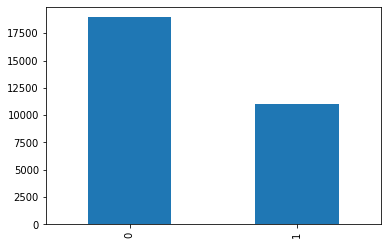

In [8]:
# see duplicated questions and non-duplicated questions

print(sub_df['is_duplicate'].value_counts())
sub_df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
qid = pd.Series(sub_df['qid1'].tolist()+sub_df['qid2'].tolist())
print('Number of unique qestions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of question repeated', x[x].shape[0])


Number of unique qestions 55455
Number of question repeated 3390


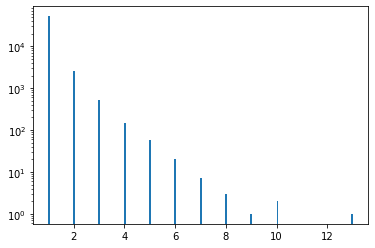

In [10]:
# plot a histogram to see Repeated questions wattage

plt.hist(qid.value_counts().values, bins= 160)
plt.yscale('log')
plt.show()

In [11]:
new_df = sub_df[['question1', 'question2']]
new_df.head()

,question1,question2
216046,Has Jay-Z ever cheated on Beyonce?,What is it like to meet Jay-Z in real life?
321415,Which YouTube channel has the most subscribers?,Which channel is currently the most subscribed...
146670,What war is next?,What would the next major war be and why?
363761,How much do you need to start trading with pen...,What is the best way to start trading penny st...
221132,What are some crazy and hard riddles?,What are the crazy riddles you know?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# merge text

questions = list(new_df['question1']) + list(new_df['question2'])

cv = CountVectorizer(max_features= 300)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [13]:
temp_df1 = pd.DataFrame(q1_arr, index= new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= new_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 600)

In [14]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
216046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
363761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
211417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
temp_df['is_duplicate'] = sub_df['is_duplicate']

In [16]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,is_duplicate
216046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
363761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=0.2, random_state = 1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7275